## About Company

Happy Customer Bank is a mid-sized private bank which deals in all kinds of loans. They have presence across all major cities in India and focus on lending products. They have a digital arm which sources customers from the internet.

## Problem description

Digital arms of banks today face challenges with lead conversion, they source leads through mediums like search, display, email campaigns and via affiliate partners. Here Happy Customer Bank faces same challenge of low conversion ratio. They have given a problem to identify the customers segments having higher conversion ratio for a specific loan product so that they can specifically target these customers, here they have provided a partial data set for salaried customers only from the last 3 months. They also capture basic details about customers like gender, DOB, existing EMI, employer Name, Loan Amount Required, Monthly Income, City, Interaction data and many others. Let’s look at the process at Happy Customer Bank.

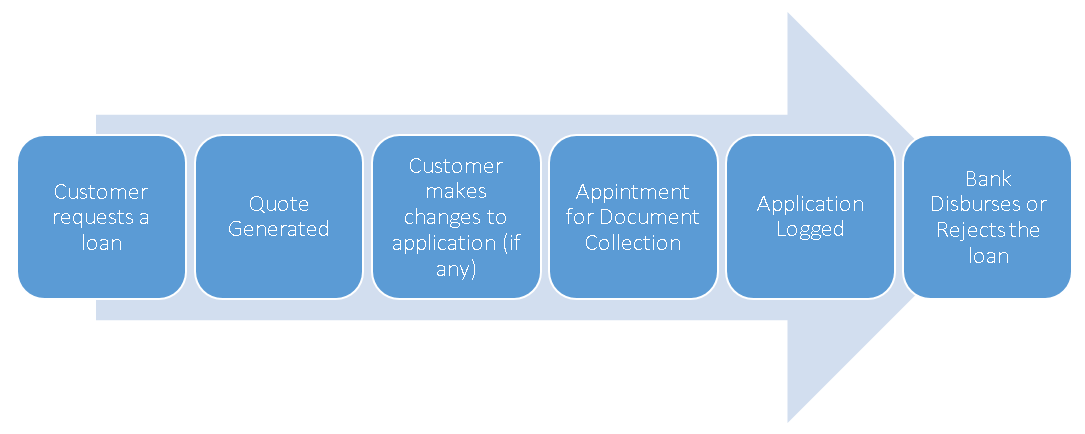

In [1]:
from IPython.display import Image
Image(filename = "Images/Process_at_Happy_Customer_Bank.png",width=800, height=400)

In above process, customer applications can drop majorly at two stages, at login and approval/ rejection by bank. Here we need to identify the segment of customers having higher disbursal rate in next 30 days.
Data Set
We have train and test data set, train data set has both input and output variable(s). Need to predict probability of disbursal for test data set.

## Data Set
We have train and test data set, train data set has both input and output variable(s). Need to predict probability of disbursal for test data set.

Source of data:

https://discuss.analyticsvidhya.com/t/hackathon-3-x-predict-customer-worth-for-happy-customer-bank/3802

## Input variables:


    ID - Unique ID (can not be used for predictions)
    Gender- Sex
    City - Current City
    Monthly_Income - Monthly Income in rupees
    DOB - Date of Birth
    Lead_Creation_Date - Lead Created on date
    Loan_Amount_Applied - Loan Amount Requested (INR)
    Loan_Tenure_Applied - Loan Tenure Requested (in years)
    Existing_EMI - EMI of Existing Loans (INR)
    Employer_Name - Employer Name
    Salary_Account- Salary account with Bank
    Mobile_Verified - Mobile Verified (Y/N)
    Var5- Continuous classified variable
    Var1- Categorical variable with multiple levels
    Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
    Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
    Interest_Rate- Interest Rate of Submitted Loan Amount
    Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
    EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)
    Filled_Form- Filled Application form post quote
    Device_Type- Device from which application was made (Browser/ Mobile)
    Var2- Categorical Variable with multiple Levels
    Source- Categorical Variable with multiple Levels
    Var4- Categorical Variable with multiple Levels
    
## Outcomes:

    LoggedIn- Application Logged (Variable for understanding the problem – cannot be used in prediction)
    Disbursed- Loan Disbursed (Target Variable)

# -------------------------------------------------------------------------------------------------------------------

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Reading data. The file has been saved according to the ISO-8859-1 standard what it refers to as "Latin alphabet no. 1"
data = pd.read_csv('Data/HappyCustomerBank/Train_nyOWmfK.csv',encoding='latin_1')
print(data.shape)

(87020, 26)


In [4]:
data.head(10)

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.90,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0
5,ID000010K00,Male,Bengaluru,45000,21-Apr-82,20-May-15,300000.0,5.0,15000.0,COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD,...,13.99,1500.0,6978.92,N,Web-browser,B,S143,3,1,0
6,ID000011L10,Female,Sindhudurg,70000,23-Oct-87,01-May-15,6.0,5.0,0.0,CARNIVAL CRUISE LINE,...,NaN,NaN,NaN,N,Web-browser,B,S133,1,0,0
7,ID000012M20,Male,Bengaluru,20000,25-Jul-75,20-May-15,200000.0,5.0,2597.0,GOLDEN TULIP FLORITECH PVT. LTD,...,NaN,NaN,NaN,N,Web-browser,B,S159,3,0,0
8,ID000013N30,Male,Kochi,75000,26-Jan-72,02-May-15,0.0,0.0,0.0,SIIS PVT LTD,...,14.85,26000.0,30824.65,Y,Mobile,C,S122,5,0,0
9,ID000014O40,Female,Mumbai,30000,12-Sep-89,03-May-15,300000.0,3.0,0.0,SOUNDCLOUD.COM,...,18.25,1500.0,10883.38,N,Web-browser,B,S133,1,0,0


In [5]:
withdraw = data[data.Disbursed == 1]
print(withdraw.value_counts().sum())
withdraw

571


,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
183,ID000269J40,Male,Delhi,43000,31-Dec-80,01-May-15,200000.0,3.0,8902.0,INDIA INTERNATIONAL CENTER,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,1,1
317,ID000467Z20,Male,Delhi,37200,03-Nov-92,01-May-15,400000.0,4.0,0.0,ZS ASSOCIATES INDIA PVT LTD,...,15.35,2000.0,11203.4,N,Web-browser,B,S133,4,1,1
362,ID000527H20,Female,Pune,500000,05-Feb-80,01-May-15,500000.0,5.0,20000.0,AMDOCS DEVELOPMENT CENTRE INDIA PVT LTD,...,NaN,NaN,NaN,N,Web-browser,B,S133,3,1,1
453,ID000655F00,Female,Delhi,150000,19-Apr-74,01-May-15,1000000.0,3.0,11000.0,STRATEGIC ANALYSIS INDIA PVT LTD,...,NaN,NaN,NaN,N,Web-browser,B,S133,3,1,1
519,ID000757D20,Male,Firozpur,27000,16-Nov-79,01-May-15,200000.0,5.0,0.0,DEPARTMENT OF POST,...,16.50,2500.0,4916.9,Y,Web-browser,B,S133,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86818,ID124525L00,Male,Delhi,160000,25-Jan-85,31-Jul-15,1000000.0,5.0,50000.0,ESCORT LTD,...,NaN,NaN,NaN,N,Web-browser,G,S122,3,1,1
86822,ID124532S20,Male,Mumbai,64000,12-May-85,31-Jul-15,500000.0,5.0,12401.0,SANDESH BANDODE,...,NaN,NaN,NaN,N,Web-browser,G,S122,3,1,1
86872,ID124603L30,Male,Jaipur,45000,30-Dec-90,31-Jul-15,0.0,0.0,0.0,MANKIND PHARMA LTD,...,13.75,8100.0,22033.0,Y,Mobile,G,S122,5,1,1
86938,ID124703H30,Female,Kolkata,105000,23-Nov-82,31-Jul-15,0.0,2.0,62418.0,IBM INDIA PVT LTD,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,1,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     87020 non-null  object 
 1   Gender                 87020 non-null  object 
 2   City                   86017 non-null  object 
 3   Monthly_Income         87020 non-null  int64  
 4   DOB                    87020 non-null  object 
 5   Lead_Creation_Date     87020 non-null  object 
 6   Loan_Amount_Applied    86949 non-null  float64
 7   Loan_Tenure_Applied    86949 non-null  float64
 8   Existing_EMI           86949 non-null  float64
 9   Employer_Name          86949 non-null  object 
 10  Salary_Account         75256 non-null  object 
 11  Mobile_Verified        87020 non-null  object 
 12  Var5                   87020 non-null  int64  
 13  Var1                   87020 non-null  object 
 14  Loan_Amount_Submitted  52407 non-null  float64
 15  Lo

In [7]:
data.corrwith(data['Disbursed'])

Monthly_Income           0.000219
Loan_Amount_Applied      0.032846
Loan_Tenure_Applied      0.037109
Existing_EMI             0.015621
Var5                     0.117146
Loan_Amount_Submitted    0.043124
Loan_Tenure_Submitted   -0.001593
Interest_Rate           -0.092410
Processing_Fee           0.033229
EMI_Loan_Submitted       0.049190
Var4                     0.036697
LoggedIn                 0.683126
Disbursed                1.000000
dtype: float64

In [8]:
print('Total percentage of disbursed loan applications is  ' + str(((data.Disbursed[data.Disbursed == 1].sum())/(len(data))*100).round(4))+ ' %')

Total percentage of disbursed loan applications is  1.4629 %


# Data preparation

In [9]:
del data['ID']  #(can not be used for predictions)

### Cities

Informations about cityies are important. The number of applications from a given city correlates with the actual city size. Without using an additional file with the number of poles in individual cities of India, we can easily use the number of applications that approximately shows the size of the city.
missing values can be supplemented with the category "Unknown".

In [10]:
data['City'].isna().sum()

1003

In [11]:
data['City'].fillna('Unknown', inplace=True)

In [12]:
data.City.value_counts().head()

Delhi        12527
Bengaluru    10824
Mumbai       10795
Hyderabad     7272
Chennai       6916
Name: City, dtype: int64

The initial assumption has not been confirmed. The dependence of the number of logins from cities does not perfectly reflect the city size. Examples are Surat (4.46 million), 10 Gurgaon (0.876 million), 9 Jaipur (3 million). The table will be created based on Wikipedia data, a list of cities in India along with the population. On this basis, the size of the cities will be compared and then grouped according to their actual size. 

https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population

In [13]:
data_City_population = pd.read_excel('Data/Cities_of_India_excel.xlsx')
print(data_City_population.shape)
data_City_population.head(10)

(318, 5)


,Rank,City,Population_2011,Population_2001,State or union territory
0,1,Mumbai,12442373,11978450,Maharashtra
1,2,Delhi,11007835,9879172,Delhi
2,3,Bengaluru,8436675,4301326,Karnataka
3,4,Hyderabad,6809970,3637483,Telangana
4,5,Ahmedabad,5570585,3520085,Gujarat
5,6,Chennai,4681087,4343645,Tamil Nadu
6,7,Kolkata,4486679,4572876,West Bengal
7,8,Surat,4467797,2433835,Gujarat
8,9,Pune,3115431,2538473,Maharashtra
9,10,Jaipur,3046163,2322575,Rajasthan


In [14]:
data_City_population['Population_2011']

0      12442373
1      11007835
2       8436675
3       6809970
4       5570585
         ...   
313      102505
314      102456
315      101520
316      100286
317      100000
Name: Population_2011, Length: 318, dtype: int64

In [15]:
data_City_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Rank                      318 non-null    int64 
 1   City                      318 non-null    object
 2   Population_2011           318 non-null    int64 
 3   Population_2001           318 non-null    object
 4   State or union territory  318 non-null    object
dtypes: int64(2), object(3)
memory usage: 12.5+ KB


In [16]:
metropoly = data_City_population.City.values[:5]
big_city = data_City_population.City.values[5:24]
medium_city = data_City_population.City.values[24:94]
small_city = data_City_population.City.values[94:319]

In [17]:
def city_sorting(city):
    if city in metropoly:
        return 'I'
    elif city in big_city:
        return 'II'
    elif city in medium_city:
        return 'III'
    elif city in small_city:
        return 'IV'
    else:
        return "V"
    
data["City_size"] = data.City.apply(city_sorting)

In [18]:
print(data.City[:11])
data.City_size[:11]

0          Delhi
1         Mumbai
2      Panchkula
3        Saharsa
4      Bengaluru
5      Bengaluru
6     Sindhudurg
7      Bengaluru
8          Kochi
9         Mumbai
10        Mumbai
Name: City, dtype: object


0       I
1       I
2      IV
3      IV
4       I
5       I
6       V
7       I
8     III
9       I
10      I
Name: City_size, dtype: object

<AxesSubplot:xlabel='City_size', ylabel='Count'>

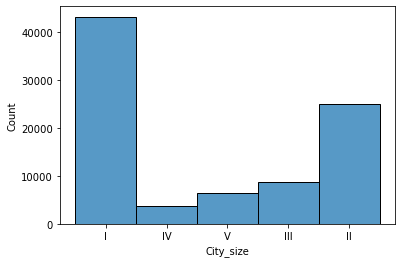

In [19]:
sns.histplot(data['City_size'], bins=5)

In [20]:
dummy_City_size = pd.get_dummies(data['City_size'], prefix='Cty_cat')
data = pd.merge(
    left=data,
    right=dummy_City_size,
    left_index=True,
    right_index=True)

del data['City']
del data['City_size']

### Date of birth

Assuming that dataset was composed in 2015, we can estimate age of the client. The rest of information stored in this variable can be dropped.

A new Age variable will arise.

In [21]:
data['DOB'] = pd.to_datetime(data['DOB'], format='%d-%b-%y')
data['Lead_Creation_Date'] = pd.to_datetime(data['Lead_Creation_Date'], format='%d-%b-%y')
data['Age'] = data.Lead_Creation_Date.apply(lambda x: x.year) - data.DOB.apply(lambda x: x.year)

<AxesSubplot:xlabel='Age', ylabel='Count'>

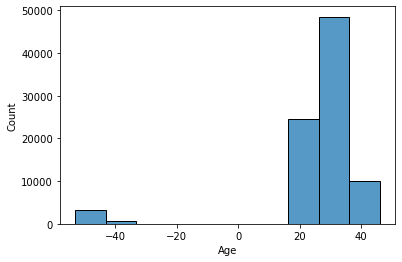

In [22]:
sns.histplot(data['Age'], bins=10)

In [23]:
data[data['Age'] < 0].head(3)

,Gender,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,...,Source,Var4,LoggedIn,Disbursed,Cty_cat_I,Cty_cat_II,Cty_cat_III,Cty_cat_IV,Cty_cat_V,Age
34,Male,56000,2064-05-28,2015-05-01,500000.0,5.0,14500.0,TEJCONTROL SYSTEMS PVT LTD,HDFC Bank,Y,...,S133,3,0,0,1,0,0,0,0,-49
58,Male,45000,2050-05-20,2015-05-01,0.0,0.0,0.0,XHZ,ICICI Bank,Y,...,S133,2,0,0,1,0,0,0,0,-35
89,Male,600000,2068-04-01,2015-05-01,1000000.0,5.0,15000.0,GOPALA KRISHNA,State Bank of India,Y,...,S133,3,0,0,0,0,1,0,0,-53


Inaccurate DOB have been inserted (last 2 digits) and date format has inserted the front 2 digits of the current year. That is why the negative figure for the age has come.

In [24]:
data['Age'] = data.Age.where(data.Age > 0, data.Age+100)

In [25]:
data = data.drop(['DOB','Lead_Creation_Date'], axis=1)

<AxesSubplot:xlabel='Age', ylabel='Count'>

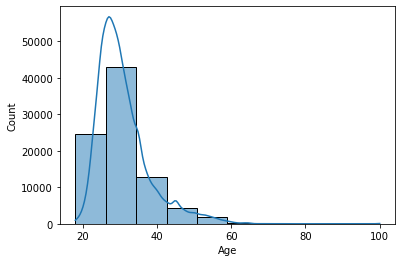

In [26]:
sns.histplot(data['Age'], kde=True, bins=10)

### Monthly_Income

<AxesSubplot:xlabel='Monthly_Income', ylabel='Count'>

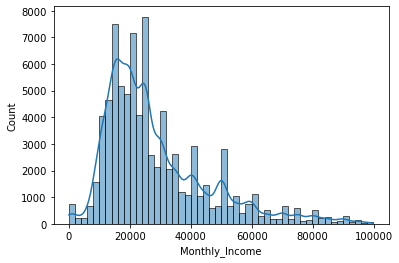

In [27]:
sns.histplot(data[data['Monthly_Income'] < 10e4]['Monthly_Income'], kde=True, bins=50) # there is a few people who earns a lot

In [28]:
print(data['Monthly_Income'].value_counts()[15:25])  # piece of data income  with one amount abowe mean
print('---------------------')
print(data['Monthly_Income'].describe())
print('---------------------')
print("Monthly_Income median:  " + str(data['Monthly_Income'].median()))

45000     1034
14000     1017
13000      975
32000      971
28000      969
100000     968
60000      965
24000      904
27000      874
26000      809
Name: Monthly_Income, dtype: int64
---------------------
count    8.702000e+04
mean     5.884997e+04
std      2.177511e+06
min      0.000000e+00
25%      1.650000e+04
50%      2.500000e+04
75%      4.000000e+04
max      4.445544e+08
Name: Monthly_Income, dtype: float64
---------------------
Monthly_Income median:  25000.0


In [29]:
min_treshold1, max_treshold1 = data.Monthly_Income.quantile([0,0.999])
print(min_treshold1, max_treshold1)
min_treshold2, max_treshold2 = data.Monthly_Income.quantile([0,0.935])
print(min_treshold2, max_treshold2)

0.0 1100000.0
0.0 80000.0


In [30]:
df1 = data[(data.Monthly_Income > min_treshold1) & (data.Monthly_Income < max_treshold1)]
df2 = data[(data.Monthly_Income > min_treshold2) & (data.Monthly_Income < max_treshold2)]

Text(0, 0.5, 'Monthly_Income')

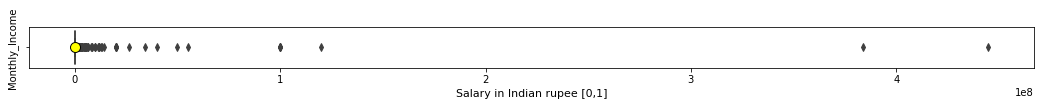

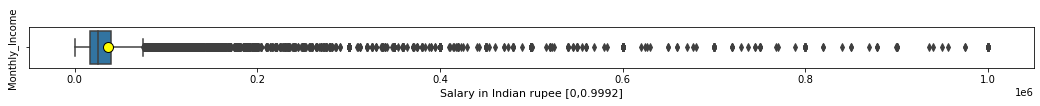

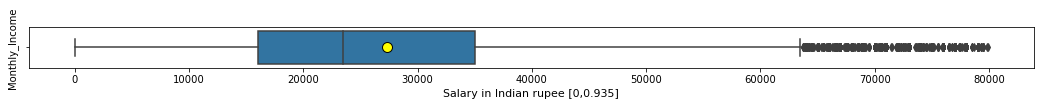

In [31]:
plt.figure(figsize=(18, 0.75))
sns.boxplot(x="Monthly_Income",
            data=data, 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"yellow", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.xlabel("Salary in Indian rupee [0,1]", size=11)
plt.ylabel("Monthly_Income", size=10)

plt.figure(figsize=(18, 0.75))
sns.boxplot(x="Monthly_Income",
            data=df1, 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"yellow", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.xlabel("Salary in Indian rupee [0,0.9992]", size=11)
plt.ylabel("Monthly_Income", size=10)

plt.figure(figsize=(18, 0.75))
sns.boxplot(x="Monthly_Income",
            data=df2, 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"yellow", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.xlabel("Salary in Indian rupee [0,0.935]", size=11)
plt.ylabel("Monthly_Income", size=10)


The employer names and monthly income below are strings and numbers in random order, unreal entry.

In [32]:
print('Employer Name:  ' + str(data.Employer_Name.iloc[53141]) + '  ,Monthly income: ' + str(data.Monthly_Income.iloc[53141]))
print('Employer Name:  ' + str(data.Employer_Name.iloc[48497]) + '  ,Monthly income: ' + str(data.Monthly_Income.iloc[48497]))
print('Employer Name:  ' + str(data.Employer_Name.iloc[25533]) + '  ,Monthly income: ' + str(data.Monthly_Income.iloc[25533]))

Employer Name:  GOOGLE  ,Monthly income: 444554443
Employer Name:  JSJSJSH  ,Monthly income: 383838383
Employer Name:  54543543535  ,Monthly income: 120100132


In [33]:
data = df1  #assigned remove outliers from the data frame 

<AxesSubplot:xlabel='Monthly_Income', ylabel='Count'>

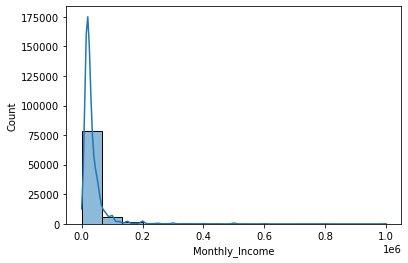

In [34]:
sns.histplot(data['Monthly_Income'], kde=True, bins=15)

<AxesSubplot:xlabel='Mntly_Incm_log', ylabel='Count'>

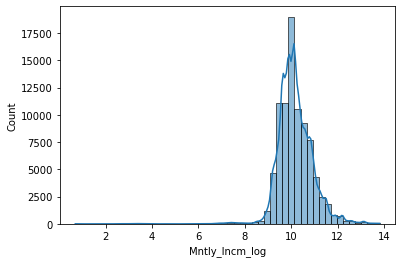

In [35]:
data['Mntly_Incm_log'] = np.log(data['Monthly_Income'] + 1)
sns.histplot(data['Mntly_Incm_log'], kde=True, bins=50)

C:\Users\arman\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arman\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


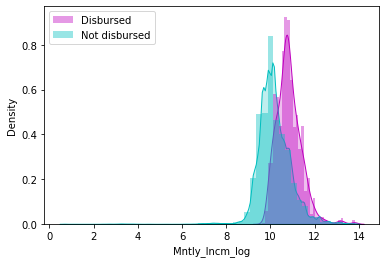

In [36]:
sns.distplot(data[data['Disbursed'] == 1]['Mntly_Incm_log'], hist=True, color="m", kde_kws={"shade": True}, label='Disbursed')
sns.distplot(data[data['Disbursed'] == 0]['Mntly_Incm_log'], hist=True, color="c", kde_kws={"shade": True}, label='Not disbursed')
plt.legend()

In [37]:
data['Monthly_Income'] = data.Monthly_Income.astype(int)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86617 entries, 0 to 87019
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 86617 non-null  object 
 1   Monthly_Income         86617 non-null  int32  
 2   Loan_Amount_Applied    86546 non-null  float64
 3   Loan_Tenure_Applied    86546 non-null  float64
 4   Existing_EMI           86546 non-null  float64
 5   Employer_Name          86546 non-null  object 
 6   Salary_Account         75175 non-null  object 
 7   Mobile_Verified        86617 non-null  object 
 8   Var5                   86617 non-null  int64  
 9   Var1                   86617 non-null  object 
 10  Loan_Amount_Submitted  52325 non-null  float64
 11  Loan_Tenure_Submitted  52325 non-null  float64
 12  Interest_Rate          27693 non-null  float64
 13  Processing_Fee         27387 non-null  float64
 14  EMI_Loan_Submitted     27693 non-null  float64
 15  Fi

### Employer_Name

We will divide set to 3 groups:
- major companies: 2
- other companies: 1
- unemployed: 0

In [39]:
print(data.Employer_Name.value_counts())
print("No data:  " + str(data['Employer_Name'].isna().sum()))

0                                                   4600
TATA CONSULTANCY SERVICES LTD (TCS)                  550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD         404
ACCENTURE SERVICES PVT LTD                           322
GOOGLE                                               299
                                                    ... 
VIACOM                                                 1
EFFIMAX ENGINEERS PRIVATE LIMITED                      1
RELIABLE BUSINESS SOLUTIONS AND SERVICES PVT LTD       1
LOYAL TEXTILE MILLS LTD                                1
ASHISH GUPTA                                           1
Name: Employer_Name, Length: 43522, dtype: int64
No data:  71


In [40]:
print('Current percentage of disbursed loan applications is  ' + str(((data.Disbursed[data.Disbursed == 1].sum())/(len(data))*100).round(4))+ ' %')

Current percentage of disbursed loan applications is  1.4697 %


Disbursed percentage of NaN in Employer_Name [2.82%] does not match the current percentage of total disbursed loan applications [1.4697%] or even "0" Employer_Name [0.11%]. NaN data will be assigned to "0" Employer_Name. The value of Monthly_Income will indicate group above median and reassign it to set '1'.

It can be assumed that "0" stands for unemployment or self-employment. In 2015, banks recognized the self-employed as an uncertain source of income. We will continue to look for specific rules on self-employment. 

In [41]:
data.loc[data.Employer_Name.isna(), 'Employer_Name'] = '0'
print(data.Employer_Name.value_counts().head())

0                                               4671
TATA CONSULTANCY SERVICES LTD (TCS)              550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     404
ACCENTURE SERVICES PVT LTD                       322
GOOGLE                                           299
Name: Employer_Name, dtype: int64


In [42]:
df_self_employed  = data.Employer_Name[data.apply(lambda row: row.astype(str).str.contains('SELF').any(), axis=1)]
df_self_employed 

12993                                             SELF
20003                                             SELF
22664                                          ONESELF
38067                                             SELF
49194                SELF EMPLOYED WOMENS ASSO.,BHARAT
56245    SYND RURAL SELF EMPLOYMENT TRAINING INSTITUTE
58632                       SELF EMPLOYED ASSO.,BHARAT
59060                                             SELF
66081                       KOSHAL SELF-HELP COOP LTD.
72679                                             SELF
74588                                           MYSELF
Name: Employer_Name, dtype: object

KOSHAL SELF-HELP COOP LTD., 
SYND RURAL SELF EMPLOYMENT TRAINING INSTITUTE, 
SELF EMPLOYED WOMENS ASSO.,BHARAT, 
SELF EMPLOYED ASSO.,BHARAT 
are companies.

In [43]:
filter_Employer_name = np.array(['SELF', 'Self Employ', 'ONESELF', 'MYSELF'])
df_self_employed_and_unemployed = data[(data.Employer_Name.isin(filter_Employer_name) | (data.Employer_Name == '0')) & (data.Disbursed == 1)]
df_self_employed_and_unemployed

,Gender,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,...,Var4,LoggedIn,Disbursed,Cty_cat_I,Cty_cat_II,Cty_cat_III,Cty_cat_IV,Cty_cat_V,Age,Mntly_Incm_log
71301,Female,32000,100000.0,0.0,9450.0,0,NaN,N,0,HBXX,...,7,0,1,0,0,0,0,1,42,10.373522
71476,Female,38500,700000.0,0.0,2000.0,0,State Bank of Mysore,N,0,HBXX,...,7,1,1,0,0,0,0,1,48,10.558439
74223,Male,25000,0.0,0.0,0.0,0,NaN,Y,0,HBXX,...,6,1,1,0,1,0,0,0,24,10.126671
77876,Male,25000,0.0,0.0,0.0,0,NaN,Y,0,HBXX,...,0,1,1,1,0,0,0,0,34,10.126671
79697,Female,53200,550000.0,0.0,0.0,0,NaN,N,0,HBXX,...,7,1,1,0,1,0,0,0,33,10.881832
85958,Male,25000,NaN,NaN,NaN,0,NaN,Y,8,HBXH,...,3,1,1,0,1,0,0,0,28,10.126671
86607,Male,37000,NaN,NaN,NaN,0,NaN,Y,12,HBXB,...,5,1,1,0,1,0,0,0,28,10.518700


<ipython-input-44-36750947569a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df_NoEmployerName[data['Monthly_Income'] < 10e4]['Monthly_Income'], kde=True, bins=50)


<AxesSubplot:xlabel='Monthly_Income', ylabel='Count'>

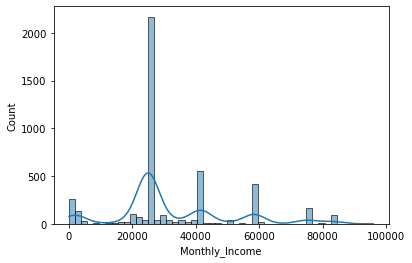

In [44]:
df_NoEmployerName = data[(data.Employer_Name == '0')]
sns.histplot(df_NoEmployerName[data['Monthly_Income'] < 10e4]['Monthly_Income'], kde=True, bins=50)

In [45]:
data['Employer_cat'] = data.Employer_Name.where(~data.Employer_Name.isin(filter_Employer_name), '0')
data.Employer_cat.value_counts().head()

0                                               4679
TATA CONSULTANCY SERVICES LTD (TCS)              550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     404
ACCENTURE SERVICES PVT LTD                       322
GOOGLE                                           299
Name: Employer_cat, dtype: int64

In [46]:
# Above median condition 25000
data['Employer_cat'] = data.Employer_Name.where(~((data.Employer_Name == '0') & (data.Monthly_Income > data['Monthly_Income'].median())), '1')
print(data.Employer_cat[71301])
print(data.Employer_cat[74223])
data.Employer_cat.value_counts().head()

1
0


0                                               2853
1                                               1820
TATA CONSULTANCY SERVICES LTD (TCS)              550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     404
ACCENTURE SERVICES PVT LTD                       322
Name: Employer_cat, dtype: int64

In [47]:
mjr_cmpns = data.Employer_Name.value_counts().index[2:51]
data['Employer_cat'] = data.Employer_cat.where(~data['Employer_cat'].isin(mjr_cmpns), other='2')
data['Employer_cat'] = data.Employer_cat.where(((data.Employer_cat == '0') |
                                                  (data.Employer_cat == '1') |
                                                  (data.Employer_cat == '2')), other='1')
data.Employer_cat.value_counts()                                       

1    77612
2     6152
0     2853
Name: Employer_cat, dtype: int64

In [48]:
data = data.drop(["Monthly_Income"], axis=1)
data = data.drop(["Employer_Name"], axis=1)
data = data.drop(["Salary_Account"], axis=1)
data = data.astype({'Employer_cat': np.uint8})

# Gender

In [49]:
print("Missing data: " + str(data['Gender'].isna().sum()))
print(data['Gender'].value_counts())

Missing data: 0
Male      49459
Female    37158
Name: Gender, dtype: int64


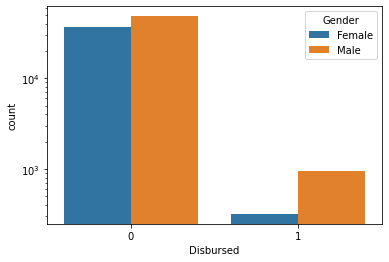

In [50]:
sns.countplot(x="Disbursed", hue="Gender", data=data)
plt.yscale('log')

In [51]:
data['Male'] = pd.get_dummies(data=data.Gender, columns=data['Gender'], drop_first=True)
data = data.drop(["Gender"], axis=1)

# Mobile_Verified

In [52]:
print("Missing data: " + str(data['Mobile_Verified'].isna().sum()))
print(data['Mobile_Verified'].value_counts())

Missing data: 0
Y    56086
N    30531
Name: Mobile_Verified, dtype: int64


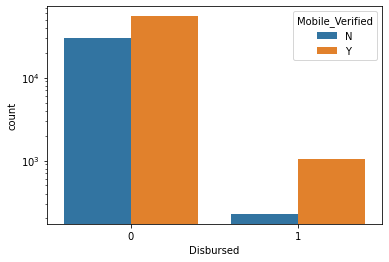

In [53]:
sns.countplot(x="Disbursed", hue="Mobile_Verified", data=data)
plt.yscale('log')

In [54]:
data['Mobile_Verified'] = pd.get_dummies(data=data.Mobile_Verified, columns=data["Mobile_Verified"], drop_first=True)

# Device_Type

In [55]:
print("Missing data: " + str(data['Device_Type'].isna().sum()))
print(data['Device_Type'].value_counts())

Missing data: 0
Web-browser    63930
Mobile         22687
Name: Device_Type, dtype: int64


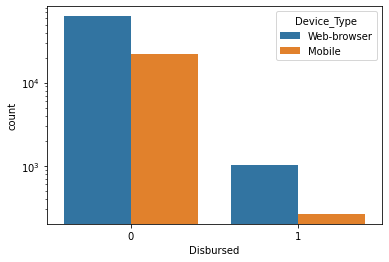

In [56]:
sns.countplot(x="Disbursed", hue="Device_Type", data=data)
plt.yscale('log')

In [57]:
data['Wb_brwsr'] = pd.get_dummies(data=data.Device_Type, columns=data['Device_Type'], drop_first=True)
data = data.drop(["Device_Type"], axis=1)

#  Filled_Form

In [58]:
print("Missing data: " + str(data['Filled_Form'].isna().sum()))
print(data['Filled_Form'].value_counts())

Missing data: 0
N    67150
Y    19467
Name: Filled_Form, dtype: int64


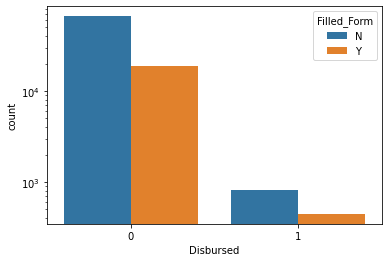

In [59]:
sns.countplot(x="Disbursed", hue="Filled_Form", data=data)
plt.yscale('log')

In [60]:
data['Filled_Form'] = pd.get_dummies(data=data.Filled_Form, columns=data['Filled_Form'], drop_first=True)

# Loan_Amount_Applied, Loan_Tenure_Applied, Existing_EMI

In [61]:
print("Missing data: " + str(data['Loan_Amount_Applied'].isna().sum()))
print(data['Loan_Amount_Applied'].value_counts())

Missing data: 71
0.0         28515
100000.0    14304
200000.0    13046
300000.0     9983
500000.0     9752
            ...  
242000.0        1
275000.0        1
460000.0        1
10.0            1
620000.0        1
Name: Loan_Amount_Applied, Length: 276, dtype: int64


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86617 entries, 0 to 87019
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_Amount_Applied    86546 non-null  float64
 1   Loan_Tenure_Applied    86546 non-null  float64
 2   Existing_EMI           86546 non-null  float64
 3   Mobile_Verified        86617 non-null  uint8  
 4   Var5                   86617 non-null  int64  
 5   Var1                   86617 non-null  object 
 6   Loan_Amount_Submitted  52325 non-null  float64
 7   Loan_Tenure_Submitted  52325 non-null  float64
 8   Interest_Rate          27693 non-null  float64
 9   Processing_Fee         27387 non-null  float64
 10  EMI_Loan_Submitted     27693 non-null  float64
 11  Filled_Form            86617 non-null  uint8  
 12  Var2                   86617 non-null  object 
 13  Source                 86617 non-null  object 
 14  Var4                   86617 non-null  int64  
 15  Lo

The three categories [0,1,2] have the same amount of missing data, eg Loan_Amount_Applied. It is difficult to supplement this data with a random, mean, or median value. There is a small percentage of this type of data. It is possible to remove it from the data set

In [63]:
data = data.dropna(subset=["Loan_Amount_Applied"])

Due to the specified zero amount, a new column will be created to inform you that the specified amount is missing.

In [64]:
data['Missing_LAA'] = data.Loan_Amount_Applied == 0.0
data.loc[data.Loan_Amount_Applied.isna(), 'Loan_Amount_Applied'] = 0.0
data['Missing_LAA'] = pd.get_dummies(data=data.Missing_LAA, columns=data['Missing_LAA'], drop_first=True)

In [65]:
print(data['Loan_Tenure_Applied'].value_counts())

0.0     33503
5.0     19058
3.0     13071
2.0      9451
4.0      6614
1.0      4802
10.0       40
7.0         3
6.0         2
9.0         1
8.0         1
Name: Loan_Tenure_Applied, dtype: int64


In [66]:
data['Missing_LTA'] = data.Loan_Tenure_Applied == 0.0
data.loc[data.Loan_Tenure_Applied.isna(), 'Loan_Tenure_Applied'] = 0.0
data['Missing_LTA'] = pd.get_dummies(data=data.Missing_LTA, columns=data['Missing_LTA'], drop_first=True)

In [67]:
print(data['Existing_EMI'].value_counts())

0.0        57876
5000.0      2693
10000.0     1736
3000.0      1581
4000.0      1226
           ...  
1989.0         1
9387.0         1
11434.0        1
13481.0        1
11243.0        1
Name: Existing_EMI, Length: 3745, dtype: int64


# Loan_Amount_Submitted, Loan_Tenure_Submitted, EMI_Loan_Submitted, 

These defective values will be posted with zeros as unallocated value, payback time after verification, etc.

In [68]:
data['Loan_Amount_Submitted'] = data.Loan_Tenure_Applied.fillna(0)
data['Loan_Tenure_Submitted'] = data.Loan_Tenure_Submitted.fillna(0)
data['EMI_Loan_Submitted'] = data.EMI_Loan_Submitted.fillna(0)
data['Interest_Rate'] = data.Interest_Rate.fillna(0)
data['Processing_Fee'] = data.Processing_Fee.fillna(0)

#### The test dataset differs from the training dataset in that it lacks the Disbursed and LoggedIn columns. So it's a good idea to use Var1,2,4,5 and Source for prediction.

# Var1

In [69]:
data['Var1'].value_counts()

HBXX    58882
HBXC     8998
HBXB     4470
HAXA     2905
HBXA     2110
HAXB     2008
HBXD     1961
HAXC     1525
HBXH      966
HCXF      721
HAYT      508
HAVC      383
HAXM      267
HCXD      237
HCYS      217
HVYS      186
HAZD      109
HCXG       78
HAXF       15
Name: Var1, dtype: int64

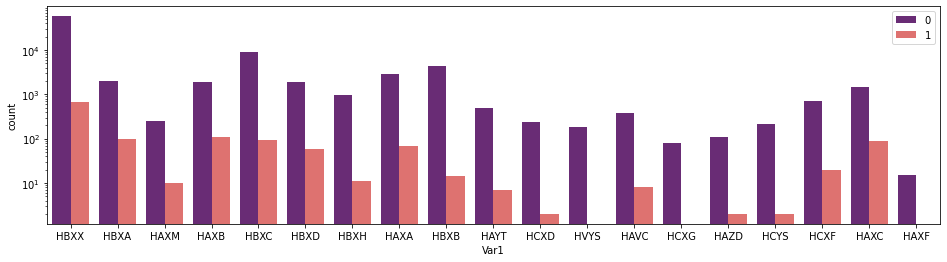

In [70]:
plt.figure(figsize=(16, 4))
sns.countplot(x="Var1", hue="Disbursed", data=data, palette='magma')
plt.yscale('log')
plt.legend(loc='upper right')

In [71]:
Var1_means = data.groupby('Var1')['Disbursed'].mean()
Var1_means = Var1_means.sort_values(ascending=False)
Var1_means = Var1_means.astype(str)
Var1_means[:3] = 'I'
Var1_means[3:8] = 'II'
Var1_means[8:16] = 'III'
Var1_means[16:] = 'IV'

def Var1_assignment(v1):
    if v1 in Var1_means:
        return Var1_means.loc[v1]
    
data["Var1"] = data.Var1.apply(Var1_assignment)

dummy_Var1 = pd.get_dummies(data['Var1'], prefix='Var1_cat')
data = pd.merge(
    left=data,
    right=dummy_Var1,
    left_index=True,
    right_index=True)

del data['Var1']
del data['Var1_cat_IV']

# Var2

In [72]:
data['Var2'].value_counts()

B    37224
G    32630
C    14198
E     1314
D      632
F      543
A        5
Name: Var2, dtype: int64

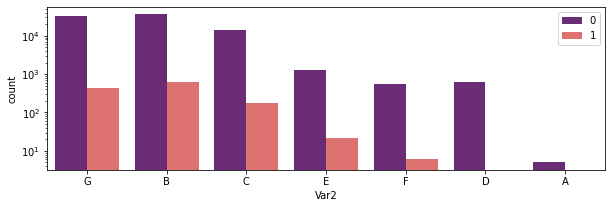

In [73]:
plt.figure(figsize=(10, 3))
sns.countplot(x="Var2", hue="Disbursed", data=data, palette='magma')
plt.yscale('log')
plt.legend(loc='upper right')

In [74]:
Var2_means = data.groupby('Var2')['Disbursed'].mean()
Var2_means = Var2_means.sort_values(ascending=False)
Var2_means = Var2_means.astype(str)

Var2_means[:2] = 'I'
Var2_means[2:5] = 'II'
Var2_means[5:] = 'III'

def Var2_assignment(v2):
    if v2 in Var2_means:
        return Var2_means.loc[v2]

data["Var2"] = data.Var2.apply(Var2_assignment)

dummy_Var2 = pd.get_dummies(data['Var2'], prefix='Var2_cat')
data = pd.merge(
    left=data,
    right=dummy_Var2,
    left_index=True,
    right_index=True)

del data['Var2']
del data['Var2_cat_III']

# Var4

In [75]:
data['Var4'].value_counts()

3    25212
1    23889
5    19934
4     6564
2     5909
0     2522
7     2286
6      230
Name: Var4, dtype: int64

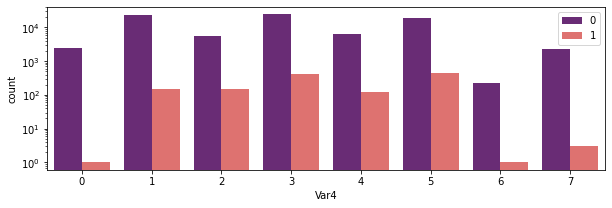

In [76]:
plt.figure(figsize=(10, 3))
sns.countplot(x="Var4", hue="Disbursed", data=data, palette='magma')
plt.yscale('log')
plt.legend(loc='upper right')

In [77]:
Var4_means = data.groupby('Var4')['Disbursed'].mean()
Var4_means = Var4_means.sort_values(ascending=False)
Var4_means = Var4_means.astype(str)

Var4_means[:2] = 'I'
Var4_means[2:4] = 'II'
Var4_means[4:6] = 'III'
Var4_means[6:] = 'IV'

def Var4_assignment(v4):
    if v4 in Var4_means:
        return Var4_means.loc[v4]

data["Var4"] = data.Var4.apply(Var4_assignment)

dummy_Var4 = pd.get_dummies(data['Var4'], prefix='Var4_cat')
data = pd.merge(
    left=data,
    right=dummy_Var4,
    left_index=True,
    right_index=True)

del data['Var4']
del data['Var4_cat_IV']

# Var5

In [78]:
data['Var5'].value_counts()

0     28755
1     12232
3      6757
11     5196
2      4481
14     3643
15     3481
12     2979
13     2614
8      2503
10     2419
9      2274
16     2087
4      1813
17     1684
7      1480
6       981
5       975
18      192
Name: Var5, dtype: int64

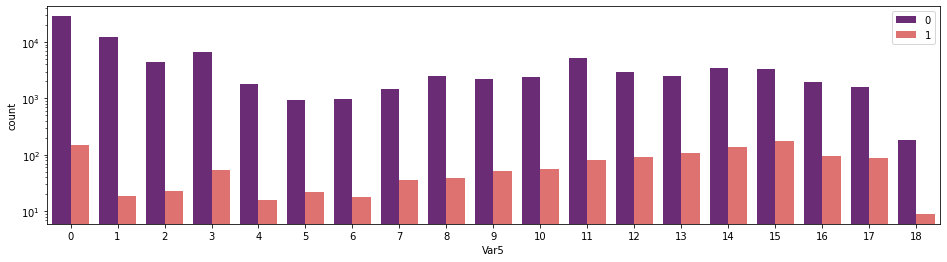

In [79]:
plt.figure(figsize=(16, 4))
sns.countplot(x="Var5", hue="Disbursed", data=data, palette='magma')
plt.yscale('log')
plt.legend(loc='upper right')

In [80]:
Var5_means = data.groupby('Var5')['Disbursed'].mean()
Var5_means = Var5_means.sort_values(ascending=False)
Var5_means

Var5
17    0.051663
15    0.049698
18    0.046875
16    0.046478
13    0.042081
14    0.038430
12    0.030211
7     0.024324
10    0.023150
9     0.022867
5     0.022564
6     0.018349
8     0.015581
11    0.015396
4     0.008825
3     0.007844
0     0.005251
2     0.005133
1     0.001553
Name: Disbursed, dtype: float64

In the chart and sorted values above, according to the effectiveness of granting a loan, a growing tendency can be observed. However, the following numeric values do not perfectly reflect dependencies. In short number 5 is not twice as weaker than 10 when determining whether the customer receives a loan. The rest quite well defines the interdependence, which is why Var5 will remain unchanged.

# Source

In [81]:
data['Source'].value_counts()

S122    38144
S133    29858
S159     5596
S143     4326
S127     1928
S137     1723
S134     1299
S161      769
S151      719
S157      645
S153      492
S156      308
S144      299
S158      208
S123       73
S141       57
S162       35
S124       24
S160       11
S150       10
S155        4
S138        3
S139        3
S136        3
S129        3
S135        2
S154        1
S130        1
S140        1
S125        1
Name: Source, dtype: int64

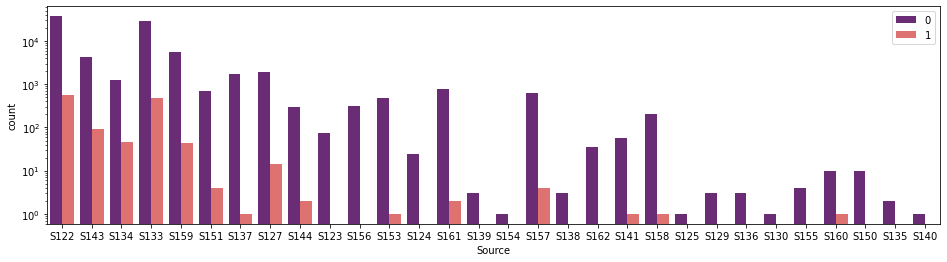

In [82]:
plt.figure(figsize=(16, 4))
sns.countplot(x="Source", hue="Disbursed", data=data, palette='magma')
plt.yscale('log')
plt.legend(loc='upper right')

In [83]:
Source_means = data.groupby('Source')['Disbursed'].mean()
Source_means = Source_means.sort_values(ascending=False)
Source_means = Source_means.astype(str)

Source_means[:1] = 'I'
Source_means[1:6] = 'II'
Source_means[6:14] = 'III'
Source_means[14:] = 'IV'

def Source_assignment(s):
    if s in Source_means:
        return Source_means.loc[s]

data["Source"] = data.Source.apply(Source_assignment)

dummy_Source = pd.get_dummies(data['Source'], prefix='Source_cat')
data = pd.merge(
    left=data,
    right=dummy_Source,
    left_index=True,
    right_index=True)

del data['Source']
del data['Source_cat_IV']

In [84]:
df = data[data['Source_cat_I'] == 1]
pd.set_option('display.max_columns', None)
df.head(11)

,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Mobile_Verified,Var5,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,LoggedIn,Disbursed,Cty_cat_I,Cty_cat_II,Cty_cat_III,Cty_cat_IV,Cty_cat_V,Age,Mntly_Incm_log,Employer_cat,Male,Wb_brwsr,Missing_LAA,Missing_LTA,Var1_cat_I,Var1_cat_II,Var1_cat_III,Var2_cat_I,Var2_cat_II,Var4_cat_I,Var4_cat_II,Var4_cat_III,Source_cat_I,Source_cat_II,Source_cat_III
39091,200000.0,2.0,15000.0,1,17,2.0,2.0,14.50,500.0,9649.89,1,1,1,1,0,0,0,0,32,10.968216,1,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0
52126,100000.0,2.0,0.0,0,0,2.0,0.0,0.00,0.0,0.00,0,0,0,0,1,0,0,0,21,9.350189,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0
52179,100000.0,3.0,0.0,0,0,3.0,0.0,0.00,0.0,0.00,0,0,0,0,1,0,0,0,24,9.210440,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0
52229,0.0,0.0,0.0,1,4,0.0,4.0,16.75,9800.0,14075.67,1,0,0,0,0,1,0,0,32,10.250652,1,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0
52256,300000.0,3.0,5000.0,1,8,3.0,3.0,28.50,4800.0,9992.20,0,0,0,1,0,0,0,0,22,10.126671,1,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0
52355,200000.0,0.0,4000.0,1,1,0.0,4.0,31.50,2600.0,4794.87,0,0,0,1,0,0,0,0,29,9.615872,1,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0
52404,0.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.00,0,0,0,1,0,0,0,0,20,10.239996,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0
52411,0.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.00,0,0,0,1,0,0,0,0,20,10.463132,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0
52440,300000.0,2.0,8000.0,0,15,2.0,0.0,0.00,0.0,0.00,0,0,0,1,0,0,0,0,36,10.819798,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0
52974,100000.0,3.0,0.0,0,1,3.0,0.0,0.00,0.0,0.00,0,0,0,0,0,0,0,1,38,9.852247,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0


### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [85]:
data.corrwith(data['Disbursed'])

Loan_Amount_Applied      0.032707
Loan_Tenure_Applied      0.036751
Existing_EMI             0.068954
Mobile_Verified          0.044417
Var5                     0.117254
Loan_Amount_Submitted    0.036751
Loan_Tenure_Submitted    0.048006
Interest_Rate            0.013515
Processing_Fee           0.041576
EMI_Loan_Submitted       0.050485
Filled_Form              0.036931
LoggedIn                 0.683627
Disbursed                1.000000
Cty_cat_I                0.017978
Cty_cat_II               0.002159
Cty_cat_III             -0.003502
Cty_cat_IV              -0.015577
Cty_cat_V               -0.022069
Age                      0.037583
Mntly_Incm_log           0.104004
Employer_cat             0.021714
Male                     0.044088
Wb_brwsr                 0.015079
Missing_LAA             -0.028971
Missing_LTA             -0.032345
Var1_cat_I               0.082921
Var1_cat_II              0.026523
Var1_cat_III            -0.077517
Var2_cat_I               0.016049
Var2_cat_II   

<AxesSubplot:>

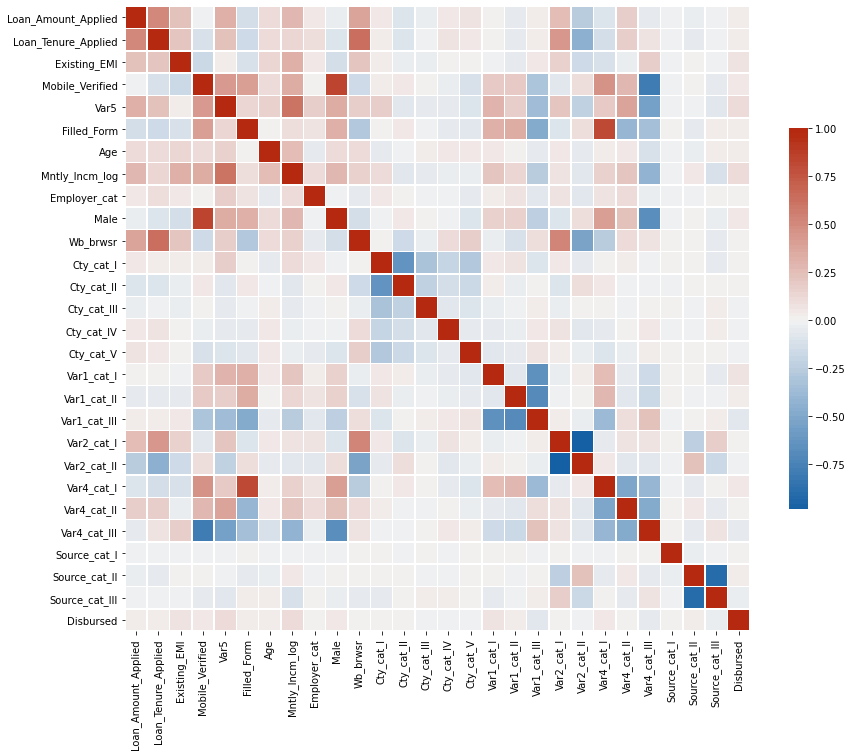

In [86]:
f, ax = plt.subplots(figsize=(14, 14))
cmap = sns.diverging_palette(250, 15, s=95, l=40,n=96)
sns.heatmap(data[['Loan_Amount_Applied','Loan_Tenure_Applied','Existing_EMI','Mobile_Verified','Var5','Filled_Form','Age',
                  'Mntly_Incm_log','Employer_cat','Male','Wb_brwsr','Cty_cat_I','Cty_cat_II','Cty_cat_III',
                  'Cty_cat_IV','Cty_cat_V','Var1_cat_I','Var1_cat_II','Var1_cat_III','Var2_cat_I','Var2_cat_II',
                  'Var4_cat_I','Var4_cat_II','Var4_cat_III','Source_cat_I','Source_cat_II','Source_cat_III',
                  'Disbursed']].corr(), vmax=1, center=0, cmap=cmap,
                  square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86546 entries, 0 to 87019
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_Amount_Applied    86546 non-null  float64
 1   Loan_Tenure_Applied    86546 non-null  float64
 2   Existing_EMI           86546 non-null  float64
 3   Mobile_Verified        86546 non-null  uint8  
 4   Var5                   86546 non-null  int64  
 5   Loan_Amount_Submitted  86546 non-null  float64
 6   Loan_Tenure_Submitted  86546 non-null  float64
 7   Interest_Rate          86546 non-null  float64
 8   Processing_Fee         86546 non-null  float64
 9   EMI_Loan_Submitted     86546 non-null  float64
 10  Filled_Form            86546 non-null  uint8  
 11  LoggedIn               86546 non-null  int64  
 12  Disbursed              86546 non-null  int64  
 13  Cty_cat_I              86546 non-null  uint8  
 14  Cty_cat_II             86546 non-null  uint8  
 15  Ct

### The strongest correlated data with Disbursed seems to be at this point Var5 and Mntly_Incm_log 

In [88]:
data = data.drop('LoggedIn', axis=1)  # can not be used to prediction

## Saving processed data to a csv file for future use. 

In [89]:
data.to_csv('Data/data_processed.csv')